In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

In [2]:
stETH_ETH_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / 'daily_snapshots/0xDC24316b9AE028F1497c275EB9192a3Ea0f67022_apr_df.csv',
    index_col=0,
    parse_dates=True,
)

stETH_ETH_apr_df 

,lp_token_total_supply,lp_token_virtual_price,pool_balance_0,pool_balance_1,block,pool_balance_market_0,pool_balance_market_1,market_eth_tvl,pool_balance_market_portion_0,pool_balance_market_portion_1,...,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,tokens,pool_address,upper_bound_nav_percent,name
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-17,496112.836745,1.074698,264218.180085,268954.074254,17495820.0,264218.180085,268780.314070,532998.494156,0.495720,0.504280,...,1.074700,-0.032590,2.312599,0.0,0.660071,0.024442,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2023-06-18,494992.199071,1.074760,264403.691969,267594.451427,17502962.0,264403.691969,267270.585601,531674.277570,0.497304,0.502696,...,1.074761,-0.060877,2.289845,0.0,0.635286,0.045658,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH
2023-06-19,494779.621402,1.074817,264450.565098,267347.001397,17510088.0,264450.565098,266949.488332,531400.053430,0.497649,0.502351,...,1.074817,-0.074749,2.271010,0.0,0.652293,0.056062,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,100.0,curve_stETH_ETH


In [3]:
stETH_ETH_apr_df.columns

Index(['lp_token_total_supply', 'lp_token_virtual_price', 'pool_balance_0',
       'pool_balance_1', 'block', 'pool_balance_market_0',
       'pool_balance_market_1', 'market_eth_tvl',
       'pool_balance_market_portion_0', 'pool_balance_market_portion_1',
       'lp_token_market_eth_value', 'pool_balance_equilibrium_0',
       'pool_balance_equilibrium_1', 'equilibrium_eth_tvl',
       'pool_balance_equilibrium_portion_0',
       'pool_balance_equilibrium_portion_1', 'lp_token_equilibrium_eth_value',
       'lp_token_discount_percent', 'raw_base_apr', 'raw_fee_apr',
       'raw_incentive_apr', 'raw_price_apr', 'tokens', 'pool_address',
       'upper_bound_nav_percent', 'name'],
      dtype='object')

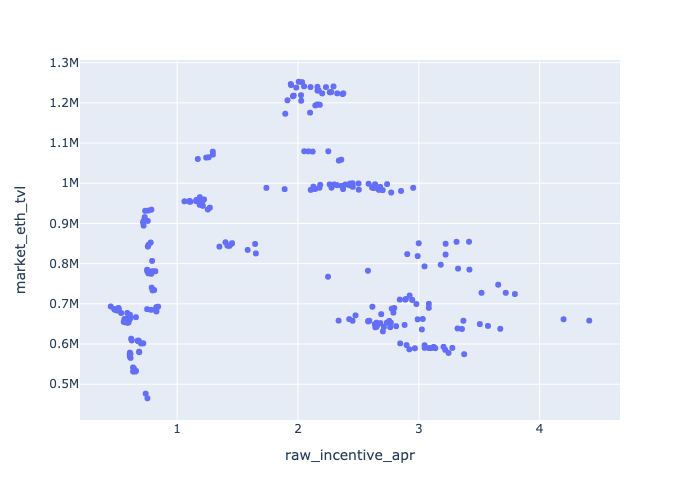

In [4]:
px.scatter(stETH_ETH_apr_df, x='raw_incentive_apr', y='market_eth_tvl')

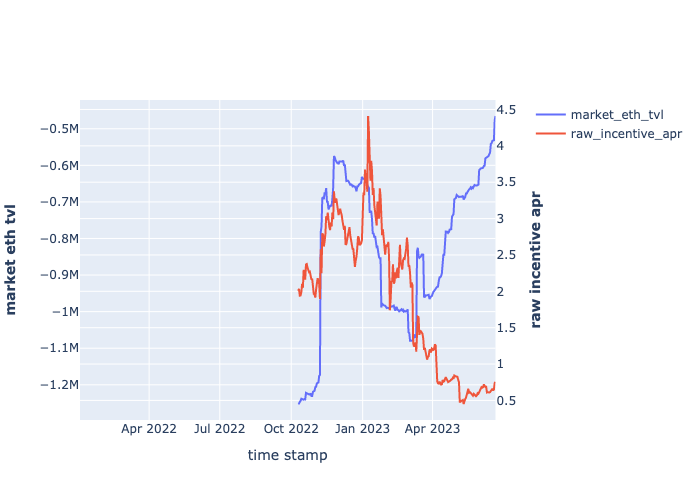

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=stETH_ETH_apr_df.index, y=-stETH_ETH_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=stETH_ETH_apr_df.index, y=stETH_ETH_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)

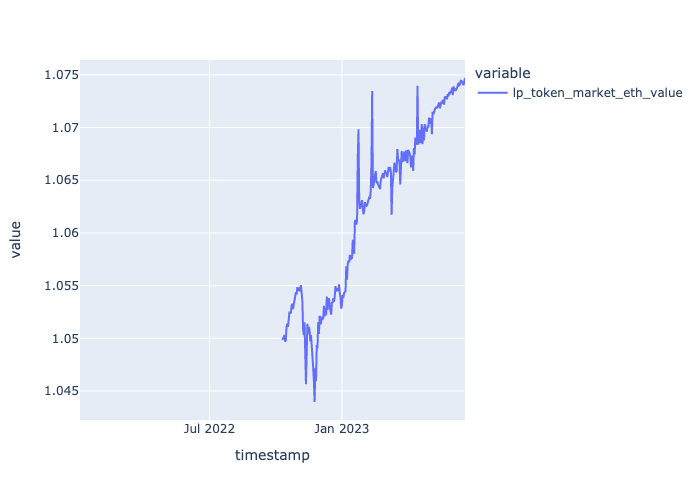

In [6]:
px.line(stETH_ETH_apr_df['lp_token_market_eth_value'])